this is experimental seeing if i can get the accuracy to improve

Loss actually tracks the inverse-confidence (for want of a better word) of the prediction. A high Loss score indicates that, even when the model is making good predictions, it is less sure of the predictions it is making...and vice-versa.

In [1]:
#importing tenserflow to create the neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LeakyReLU
import pandas as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')
train, test = train_test_split(data, test_size=0.2)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

# ros = RandomOverSampler(random_state=42)
# X_train_r, y_train_r = ros.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train_s))


In [3]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)
model_3_a = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer_A"),
        layers.Dense(32, activation="relu", name="layer_B"),
        layers.Dense(32, activation="relu", name="layer_C"),
        layers.Dense(32, activation="relu", name="layer_D"),
        layers.Dense(32, activation="relu", name="layer_E"),
        layers.Dense(32, activation="relu", name="layer_F"),
        layers.Dense(32, activation="relu", name="layer_G"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_3_b = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer_A"),
        layers.Dense(16, activation="relu", name="layer_B"),
        layers.Dense(8, activation="relu", name="layer_C"),
        layers.Dense(16, activation="relu", name="layer_D"),
        layers.Dense(32, activation="relu", name="layer_E"),
        layers.Dense(16, activation="relu", name="layer_F"),
        layers.Dense(8, activation="relu", name="layer_G"),
        layers.Dense(1, activation="sigmoid")
    ]
)

#is the best perfoming one out of the many
model_3_c_1 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(1, activation="sigmoid")
    ]
)
# from the 3 c models, model 2 was the best performing
model_3_c_2 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_3_c_2_leaky = keras.Sequential(
    [
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_A"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_B"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_C"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_D"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_E"),
        layers.Dense(1, activation="sigmoid")
    ]
)

#has 6 hidden layers
model_3_c_2_a = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dense(1, activation="sigmoid")
    ]
)
#has 9 hidden layers
model_3_c_2_b = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dense(256, activation="relu", name="layer_G"),
        layers.Dense(256, activation="relu", name="layer_H"),
        layers.Dense(256, activation="relu", name="layer_I"),
        layers.Dense(1, activation="sigmoid")
    ]
)


model_3_c_3 = keras.Sequential(
    [
        layers.Dense(512, activation="relu", name="layer_A"),
        layers.Dense(512, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(64, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
)

model_3_a.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_b.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model_3_c_2_leaky.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_2_a.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_2_b.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model_3_c_3.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [4]:
#fiting the first NN
hist_a = model_3_a.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 4s 6ms/step - loss: 0.6907 - accuracy: 0.5269 - val_loss: 0.6748 - val_accuracy: 0.5389
Epoch 2/200
403/403 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5471 - val_loss: 0.7132 - val_accuracy: 0.3786
Epoch 3/200
403/403 [==============================] - 1s 3ms/step - loss: 0.6796 - accuracy: 0.5615 - val_loss: 0.7154 - val_accuracy: 0.4819
Epoch 4/200
403/403 [==============================] - 2s 4ms/step - loss: 0.6743 - accuracy: 0.5684 - val_loss: 0.6681 - val_accuracy: 0.6059
Epoch 5/200
403/403 [==============================] - 1s 3ms/step - loss: 0.6702 - accuracy: 0.5795 - val_loss: 0.6743 - val_accuracy: 0.5598
Epoch 6/200
403/403 [==============================] - 1s 3ms/step - loss: 0.6655 - accuracy: 0.5820 - val_loss: 0.7444 - val_accuracy: 0.4264
Epoch 7/200
403/403 [==============================] - 1s 3ms/step - loss: 0.6614 - accuracy: 0.5892 - val_loss: 0.6784 - val_accuracy: 0.5439

[]

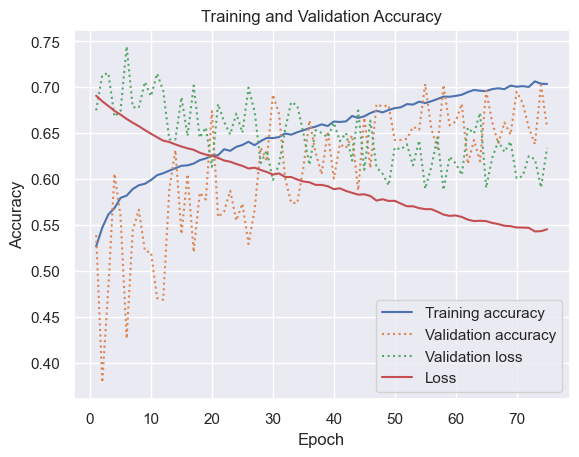

In [5]:
sns.set()
 
acc = hist_a.history['accuracy']
val = hist_a.history['val_accuracy']
loss = hist_a.history['loss']
loss_val = hist_a.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 1s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

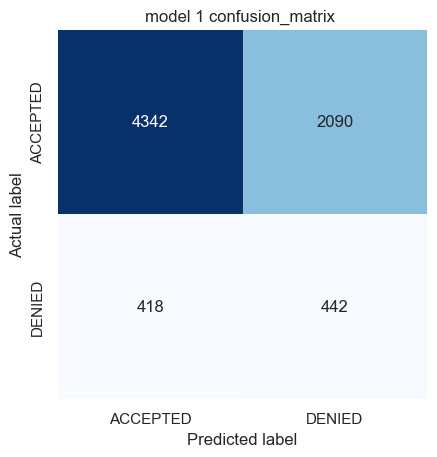

In [6]:
y_predicted = model_3_a.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [7]:
hist_b = model_3_b.fit(x_train_s,y_train_s, epochs=50, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
403/403 [==============================] - 3s 3ms/step - loss: 0.6912 - accuracy: 0.5243 - val_loss: 0.7255 - val_accuracy: 0.2586
Epoch 2/50
403/403 [==============================] - 1s 2ms/step - loss: 0.6865 - accuracy: 0.5478 - val_loss: 0.7416 - val_accuracy: 0.2988
Epoch 3/50
403/403 [==============================] - 1s 2ms/step - loss: 0.6835 - accuracy: 0.5542 - val_loss: 0.6548 - val_accuracy: 0.6507
Epoch 4/50
403/403 [==============================] - 1s 2ms/step - loss: 0.6799 - accuracy: 0.5632 - val_loss: 0.7045 - val_accuracy: 0.4502
Epoch 5/50
403/403 [==============================] - 1s 2ms/step - loss: 0.6770 - accuracy: 0.5689 - val_loss: 0.6620 - val_accuracy: 0.5543
Epoch 6/50
403/403 [==============================] - 1s 3ms/step - loss: 0.6739 - accuracy: 0.5734 - val_loss: 0.6808 - val_accuracy: 0.5405
Epoch 7/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6716 - accuracy: 0.5765 - val_loss: 0.6711 - val_accuracy: 0.5531
Epoch 

[]

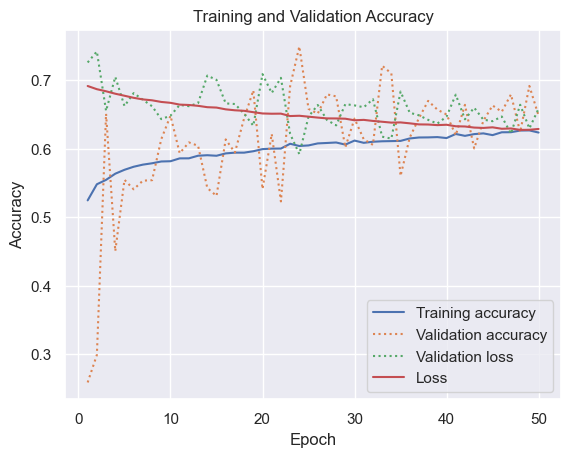

In [8]:
sns.set()
 
acc = hist_b.history['accuracy']
val = hist_b.history['val_accuracy']
loss = hist_b.history['loss']
loss_val = hist_b.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

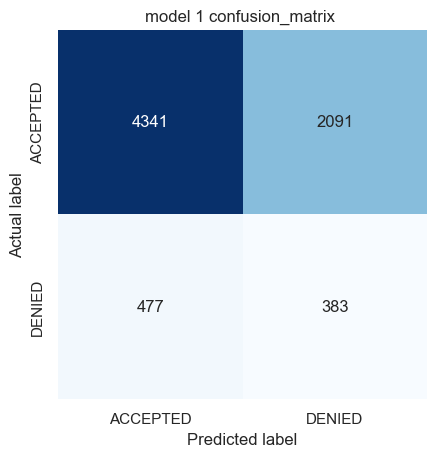

In [9]:
y_predicted = model_3_b.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [10]:
hist_c = model_3_c_1.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 5s 7ms/step - loss: 0.6890 - accuracy: 0.5333 - val_loss: 0.7149 - val_accuracy: 0.4423
Epoch 2/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6793 - accuracy: 0.5576 - val_loss: 0.6436 - val_accuracy: 0.6034
Epoch 3/200
403/403 [==============================] - 3s 6ms/step - loss: 0.6720 - accuracy: 0.5708 - val_loss: 0.6636 - val_accuracy: 0.5779
Epoch 4/200
403/403 [==============================] - 2s 6ms/step - loss: 0.6645 - accuracy: 0.5824 - val_loss: 0.7054 - val_accuracy: 0.4499
Epoch 5/200
403/403 [==============================] - 3s 6ms/step - loss: 0.6581 - accuracy: 0.5899 - val_loss: 0.6555 - val_accuracy: 0.6193
Epoch 6/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6507 - accuracy: 0.6022 - val_loss: 0.6495 - val_accuracy: 0.5875
Epoch 7/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6421 - accuracy: 0.6092 - val_loss: 0.6426 - val_accuracy: 0.5882

[]

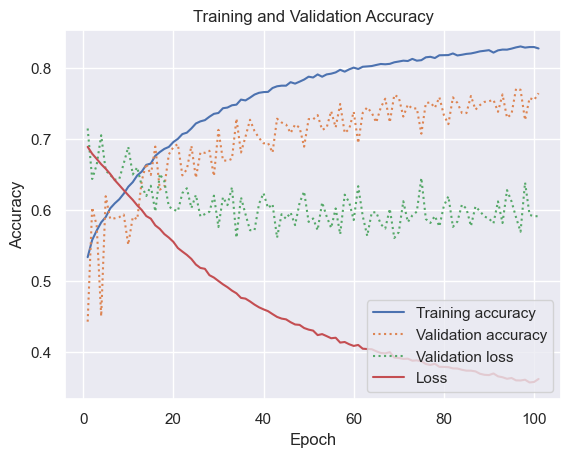

In [11]:
sns.set()
 
acc = hist_c.history['accuracy']
val = hist_c.history['val_accuracy']
loss = hist_c.history['loss']
loss_val = hist_c.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

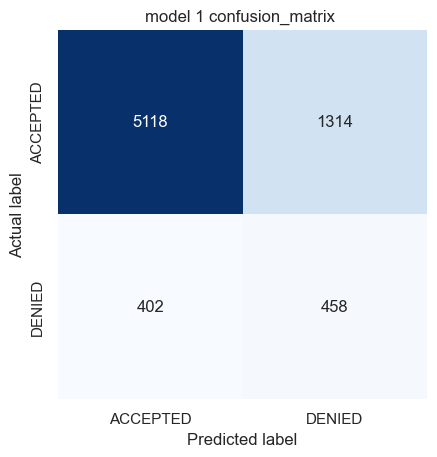

In [12]:
y_predicted = model_3_c_1.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [13]:
hist_c_2 = model_3_c_2.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 6s 9ms/step - loss: 0.6899 - accuracy: 0.5278 - val_loss: 0.6506 - val_accuracy: 0.6307
Epoch 2/200
403/403 [==============================] - 4s 10ms/step - loss: 0.6799 - accuracy: 0.5582 - val_loss: 0.7370 - val_accuracy: 0.3184
Epoch 3/200
403/403 [==============================] - 4s 11ms/step - loss: 0.6722 - accuracy: 0.5724 - val_loss: 0.6999 - val_accuracy: 0.5448
Epoch 4/200
403/403 [==============================] - 4s 11ms/step - loss: 0.6646 - accuracy: 0.5786 - val_loss: 0.6858 - val_accuracy: 0.4893
Epoch 5/200
403/403 [==============================] - 4s 10ms/step - loss: 0.6572 - accuracy: 0.5879 - val_loss: 0.6925 - val_accuracy: 0.5587
Epoch 6/200
403/403 [==============================] - 5s 13ms/step - loss: 0.6505 - accuracy: 0.5983 - val_loss: 0.6434 - val_accuracy: 0.6131
Epoch 7/200
403/403 [==============================] - 4s 11ms/step - loss: 0.6418 - accuracy: 0.6100 - val_loss: 0.6842 - val_accuracy: 

[]

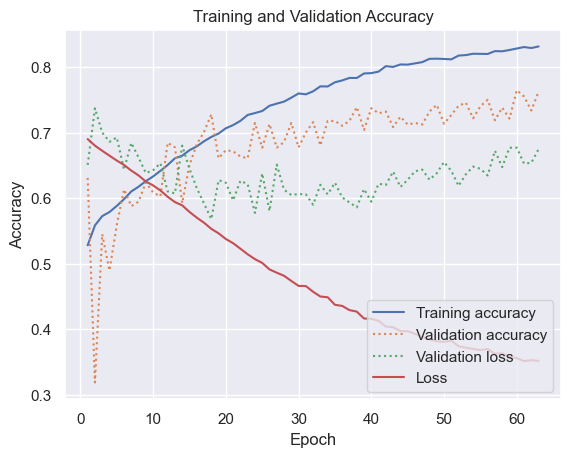

In [14]:
sns.set()
 
acc = hist_c_2.history['accuracy']
val = hist_c_2.history['val_accuracy']
loss = hist_c_2.history['loss']
loss_val = hist_c_2.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

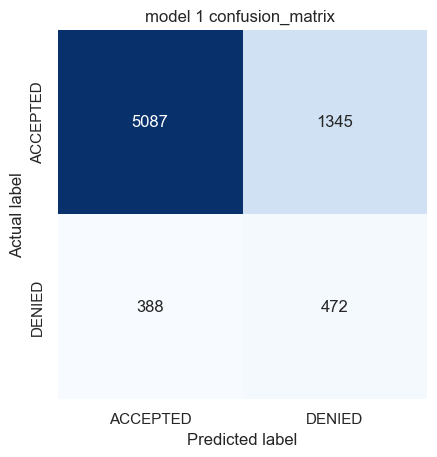

In [15]:
y_predicted = model_3_c_2.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [16]:
hist_c_3 = model_3_c_3.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 9s 18ms/step - loss: 0.6896 - accuracy: 0.5329 - val_loss: 0.6810 - val_accuracy: 0.5865
Epoch 2/200
403/403 [==============================] - 8s 19ms/step - loss: 0.6804 - accuracy: 0.5559 - val_loss: 0.7100 - val_accuracy: 0.4192
Epoch 3/200
403/403 [==============================] - 8s 19ms/step - loss: 0.6724 - accuracy: 0.5684 - val_loss: 0.6655 - val_accuracy: 0.5741
Epoch 4/200
403/403 [==============================] - 8s 19ms/step - loss: 0.6653 - accuracy: 0.5781 - val_loss: 0.6287 - val_accuracy: 0.7282
Epoch 5/200
403/403 [==============================] - 6s 15ms/step - loss: 0.6594 - accuracy: 0.5869 - val_loss: 0.6585 - val_accuracy: 0.5990
Epoch 6/200
403/403 [==============================] - 6s 14ms/step - loss: 0.6542 - accuracy: 0.5930 - val_loss: 0.6319 - val_accuracy: 0.5874
Epoch 7/200
403/403 [==============================] - 7s 16ms/step - loss: 0.6448 - accuracy: 0.6040 - val_loss: 0.6857 - val_accuracy:

[]

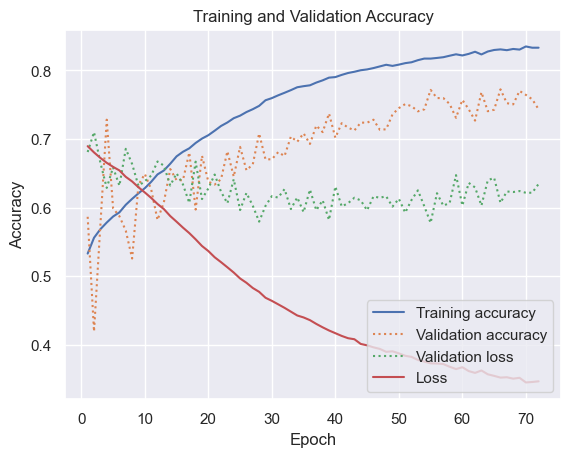

In [17]:
sns.set()
 
acc = hist_c_3.history['accuracy']
val = hist_c_3.history['val_accuracy']
loss = hist_c_3.history['loss']
loss_val = hist_c_3.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 1s 3ms/step


Text(110.44999999999997, 0.5, 'Actual label')

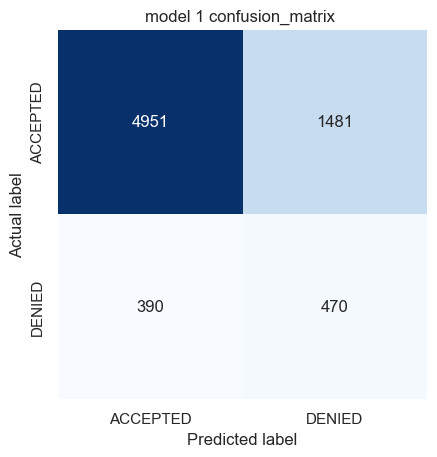

In [18]:
y_predicted = model_3_c_3.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

From the previous runs, model_3_c_2 was the best performing 

(this was from a previous run, may be diffrent than final run)

loss: 0.3392 - accuracy: 0.8387 - val_loss: 0.7488 - val_accuracy: 0.7408

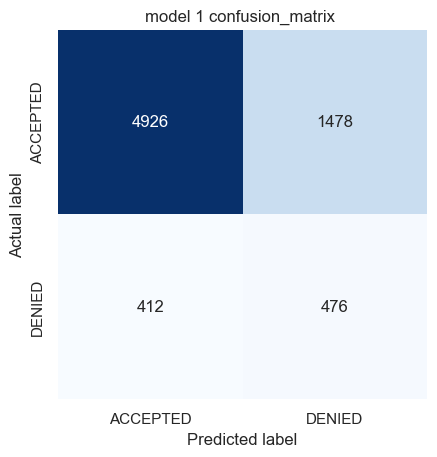




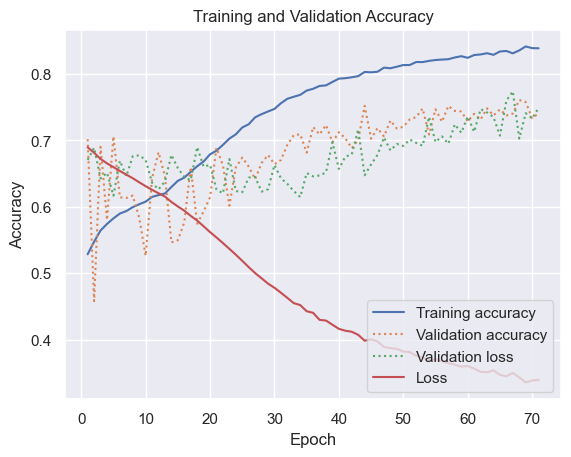

In [19]:
#testing with diffrent activation method, changed from relu to leaky relu
hist_leaky = model_3_c_2_leaky.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 4s 7ms/step - loss: 0.6918 - accuracy: 0.5235 - val_loss: 0.6766 - val_accuracy: 0.5948
Epoch 2/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6874 - accuracy: 0.5364 - val_loss: 0.6991 - val_accuracy: 0.5038
Epoch 3/200
403/403 [==============================] - 4s 10ms/step - loss: 0.6829 - accuracy: 0.5487 - val_loss: 0.6290 - val_accuracy: 0.7430
Epoch 4/200
403/403 [==============================] - 3s 8ms/step - loss: 0.6784 - accuracy: 0.5595 - val_loss: 0.6911 - val_accuracy: 0.5247
Epoch 5/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6755 - accuracy: 0.5604 - val_loss: 0.6078 - val_accuracy: 0.7591
Epoch 6/200
403/403 [==============================] - 3s 8ms/step - loss: 0.6726 - accuracy: 0.5686 - val_loss: 0.6675 - val_accuracy: 0.5834
Epoch 7/200
403/403 [==============================] - 3s 8ms/step - loss: 0.6694 - accuracy: 0.5712 - val_loss: 0.6053 - val_accuracy: 0.689

[]

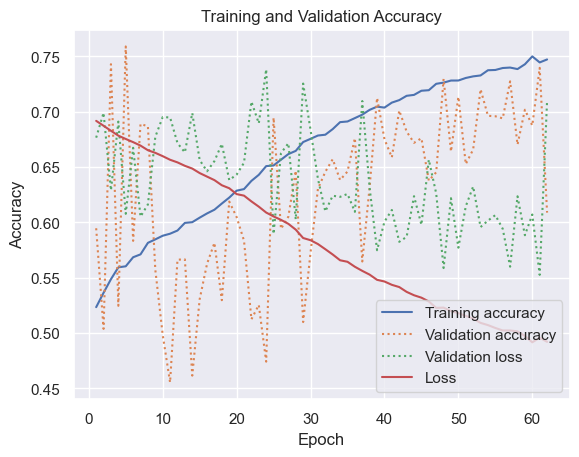

In [20]:
sns.set()
 
acc = hist_leaky.history['accuracy']
val = hist_leaky.history['val_accuracy']
loss = hist_leaky.history['loss']
loss_val = hist_leaky.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

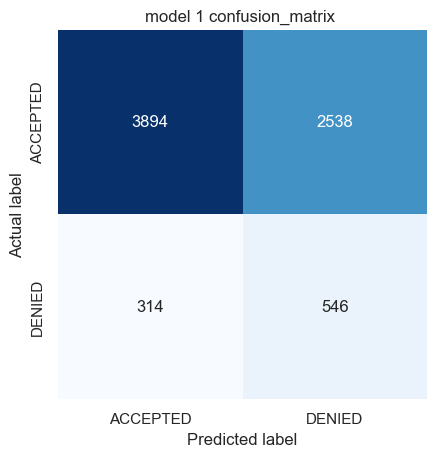

In [21]:


y_predicted = model_3_c_2_leaky.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [22]:
hist_3_c_2_a = model_3_c_2_a.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 5s 8ms/step - loss: 0.6907 - accuracy: 0.5278 - val_loss: 0.6867 - val_accuracy: 0.3615
Epoch 2/200
403/403 [==============================] - 3s 8ms/step - loss: 0.6836 - accuracy: 0.5499 - val_loss: 0.6711 - val_accuracy: 0.5019
Epoch 3/200
403/403 [==============================] - 3s 8ms/step - loss: 0.6746 - accuracy: 0.5647 - val_loss: 0.6749 - val_accuracy: 0.6513
Epoch 4/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6684 - accuracy: 0.5711 - val_loss: 0.6252 - val_accuracy: 0.6317
Epoch 5/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6609 - accuracy: 0.5834 - val_loss: 0.6674 - val_accuracy: 0.5045
Epoch 6/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6528 - accuracy: 0.5940 - val_loss: 0.6700 - val_accuracy: 0.6185
Epoch 7/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6457 - accuracy: 0.6028 - val_loss: 0.6659 - val_accuracy: 0.5675

[]

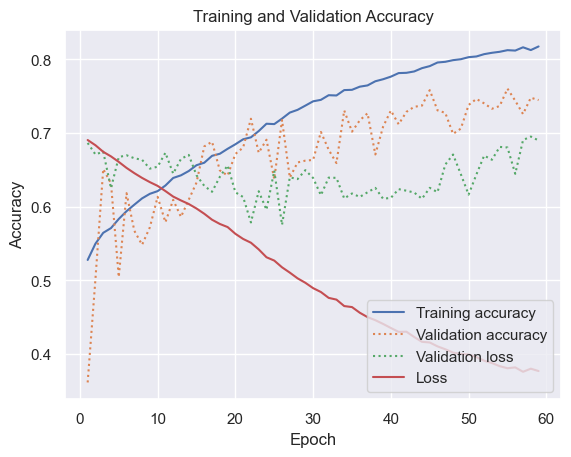

In [23]:
sns.set()
 
acc = hist_3_c_2_a.history['accuracy']
val = hist_3_c_2_a.history['val_accuracy']
loss = hist_3_c_2_a.history['loss']
loss_val = hist_3_c_2_a.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

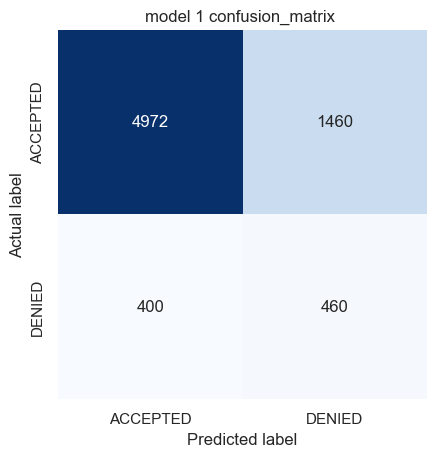

In [24]:
y_predicted = model_3_c_2_a.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [25]:
hist_3_c_2_b = model_3_c_2_b.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 7s 13ms/step - loss: 0.6925 - accuracy: 0.5122 - val_loss: 0.6797 - val_accuracy: 0.4624
Epoch 2/200
403/403 [==============================] - 5s 12ms/step - loss: 0.6876 - accuracy: 0.5394 - val_loss: 0.7012 - val_accuracy: 0.7356
Epoch 3/200
403/403 [==============================] - 4s 10ms/step - loss: 0.6810 - accuracy: 0.5545 - val_loss: 0.6532 - val_accuracy: 0.5219
Epoch 4/200
403/403 [==============================] - 5s 12ms/step - loss: 0.6739 - accuracy: 0.5645 - val_loss: 0.6788 - val_accuracy: 0.5368
Epoch 5/200
403/403 [==============================] - 5s 13ms/step - loss: 0.6671 - accuracy: 0.5756 - val_loss: 0.6047 - val_accuracy: 0.6425
Epoch 6/200
403/403 [==============================] - 6s 14ms/step - loss: 0.6600 - accuracy: 0.5861 - val_loss: 0.6113 - val_accuracy: 0.7050
Epoch 7/200
403/403 [==============================] - 5s 14ms/step - loss: 0.6547 - accuracy: 0.5909 - val_loss: 0.6492 - val_accuracy:

[]

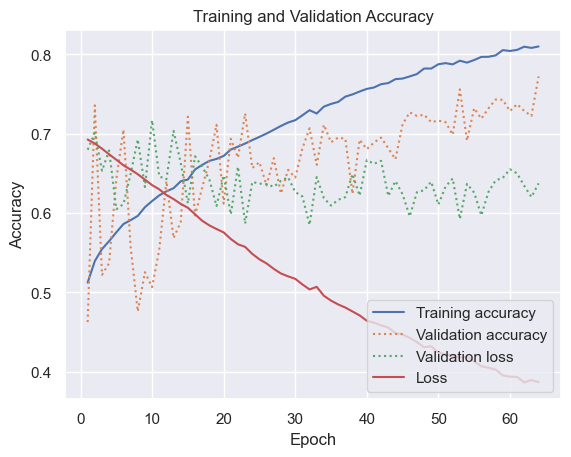

In [26]:
sns.set()
 
acc = hist_3_c_2_b.history['accuracy']
val = hist_3_c_2_b.history['val_accuracy']
loss = hist_3_c_2_b.history['loss']
loss_val = hist_3_c_2_b.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

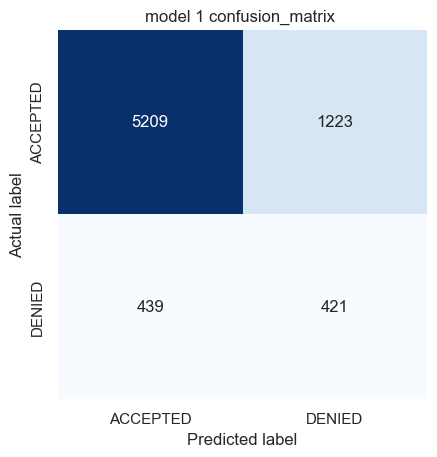

In [27]:

y_predicted = model_3_c_2_b.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

model_3_c_1

3 hidden layers with 256 nodes

loss: 0.3614 - accuracy: 0.8279 - val_loss: 0.5912 - val_accuracy: 0.7647

---------------------------------------------------------------------------------------------------------------------------

model_3_c_2

5 hidden layers with 256 nodes

loss: 0.3513 - accuracy: 0.8314 - val_loss: 0.6745 - val_accuracy: 0.7623


---------------------------------------------------------------------------------------------------------------------------

model_3_c_3

4 hidden layers 2 with 512 nodes, 

		1 with 256 nodes, 

		1 with 64 nodes

loss: 0.3465 - accuracy: 0.8332 - val_loss: 0.6345 - val_accuracy: 0.7434



---------------------------------------------------------------------------------------------------------------------------


model_3_c_2_leaky

5 hidden layers with 256 nodes with a leaky activation

loss: 0.4922 - accuracy: 0.7473 - val_loss: 0.7101 - val_accuracy: 0.6089


---------------------------------------------------------------------------------------------------------------------------

model_3_c_2_a

6 hidden layers with 256 nodes with relu activation

loss: 0.3770 - accuracy: 0.8177 - val_loss: 0.6901 - val_accuracy: 0.7449


---------------------------------------------------------------------------------------------------------------------------

model_3_c_2_b

9 hidden layers with 256 nodes

loss: 0.3867 - accuracy: 0.8099 - val_loss: 0.6373 - val_accuracy: 0.7721
